In [1]:
import pandas as pd
import numpy as np

In [2]:
path='https://raw.githubusercontent.com/pranavkotak8/Datasets/master/new-thyroid.csv'
df1=pd.read_csv(path)

In [3]:
df1

,2,3,4,5,6,class
0,107,10.1,2.2,0.9,2.7,1
1,113,9.9,3.1,2.0,5.9,1
2,127,12.9,2.4,1.4,0.6,1
3,109,5.3,1.6,1.4,1.5,1
4,105,7.3,1.5,1.5,-0.1,1
...,...,...,...,...,...,...
210,118,6.5,1.3,1.7,11.5,3
211,139,4.2,0.7,4.3,6.3,3
212,103,5.1,1.4,1.2,5.0,3
213,97,4.7,1.1,2.1,12.6,3


In [4]:
# Finding the Missing Values
df1.isna().sum()/len(df1)

2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
class    0.0
dtype: float64

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       215 non-null    int64  
 1   3       215 non-null    float64
 2   4       215 non-null    float64
 3   5       215 non-null    float64
 4   6       215 non-null    float64
 5   class   215 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 10.2 KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


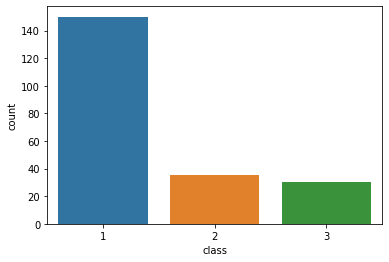

In [7]:
# Lets check out the Target Column
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(df1['class'])
plt.show()

In [8]:
target=df1['class']

In [9]:
df1.drop(columns={'class'},inplace=True)

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [11]:
# Splitting into trainset and testset in the ratio 80:20
seed=8
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df1,target,test_size=0.2,random_state=seed)

In [14]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Balancing the target column

Class=1, n=150 (33.333%)
Class=2, n=150 (33.333%)
Class=3, n=150 (33.333%)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


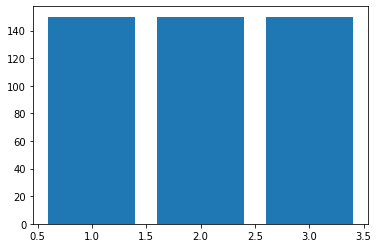

In [17]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(df1, target)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


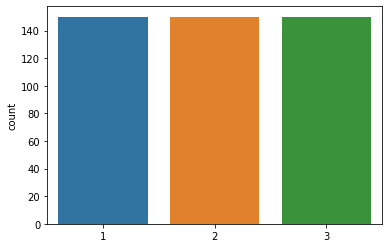

In [21]:
# New Balanced Target Feature Column
import seaborn as sns
sns.countplot(y)

In [22]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
logistic=linear_model.LogisticRegression()
sgd=linear_model.SGDClassifier()

In [ ]:
y=pd.DataFrame(y)
y.replace(1,0,inplace=True)
y.replace(2,1,inplace=True)
y.replace(3,2,inplace=True)

In [35]:
# Splitting into trainset and testset in the ratio 80:20
seed=8
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=seed)

In [52]:
# Performing Decision Tree Classifier on the Dataset
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
from sklearn.metrics import accuracy_score
y_test_pred_dc = dc.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred_dc)
print("Accuracy:"+str(accuracy_test))

Accuracy:0.9888888888888889


In [36]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(logistic,X_train,y_train,cv=5,scoring='accuracy')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

In [37]:
np.mean(scores)

0.9888888888888889

In [38]:
scores_sgd=cross_val_score(sgd,X_train,y_train,cv=5,scoring='accuracy')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [39]:
np.mean(scores_sgd)

0.7972222222222222

In [40]:
# GridSearch CV on Logistic Regression
from sklearn.model_selection import GridSearchCV
gscv_log=GridSearchCV(logistic, {
                      'penalty': ['l1','l2','elasticnet'],
                      'C': [0.1,0.5,0.25,0.8,0.9,0.95,1.5,2.3,5.5],
                      'class_weight' : [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}],
                      'solver' : ['liblinear', 'saga']
                      },cv=3,return_train_score=False,n_jobs=-1)

In [41]:
gscv_log.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 0.25, 0.8, 0.9, 0.95, 1.5, 2.3, 5.5],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fals

In [42]:
gscv_log.best_score_

0.9833333333333334

In [43]:
# Accuracy on the Test Set
from sklearn.metrics import accuracy_score
y_test_pred = gscv_log.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy:"+str(accuracy_test))

Accuracy:1.0


In [44]:
# Performing Random Forest on the Dataset
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
y_test_pred_rf = rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred_rf)
print("Accuracy:"+str(accuracy_test))

Accuracy:0.9888888888888889


In [46]:
# Performing Neural Networks on the Dataset
# Importing the Necessary Libraries for Neural Networks
from keras import Sequential
from keras.layers import LeakyReLU
from keras.layers import Dense
import tensorflow
from keras.utils import to_categorical

In [47]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [48]:
X_train.shape

(360, 5)

In [49]:
# Performing Neural Network on X_train and Y_train
model=Sequential()
model.add(Dense(units=580, activation='relu', input_dim=5))
model.add(Dense(units=2800, activation='relu'))
model.add(Dense(units=1041, activation='relu'))
model.add(Dense(units=2041))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(units=3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history1=model.fit(X_train, y_train, epochs=100,validation_split=0.2, verbose=1,batch_size=128)

Epoch 1/100
3/3 [==============================] - 0s 134ms/step - loss: 16.9756 - accuracy: 0.3681 - val_loss: 5.7139 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 84ms/step - loss: 5.3409 - accuracy: 0.4583 - val_loss: 3.1587 - val_accuracy: 0.2500
Epoch 3/100
3/3 [==============================] - 0s 82ms/step - loss: 2.8448 - accuracy: 0.3368 - val_loss: 2.7440 - val_accuracy: 0.3611
Epoch 4/100
3/3 [==============================] - 0s 81ms/step - loss: 2.0785 - accuracy: 0.4688 - val_loss: 1.7365 - val_accuracy: 0.3194
Epoch 5/100
3/3 [==============================] - 0s 86ms/step - loss: 1.1205 - accuracy: 0.5000 - val_loss: 0.8404 - val_accuracy: 0.3750
Epoch 6/100
3/3 [==============================] - 0s 84ms/step - loss: 0.8827 - accuracy: 0.4757 - val_loss: 0.6582 - val_accuracy: 0.7639
Epoch 7/100
3/3 [==============================] - 0s 82ms/step - loss: 0.5971 - accuracy: 0.7743 - val_loss: 0.5124 - val_accuracy: 0.8611
Epoch 8/100
3/3 [=

In [50]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 9ms/step - loss: 0.0314 - accuracy: 0.9889


[0.03142727538943291, 0.9888888597488403]

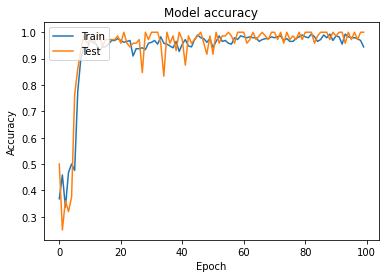

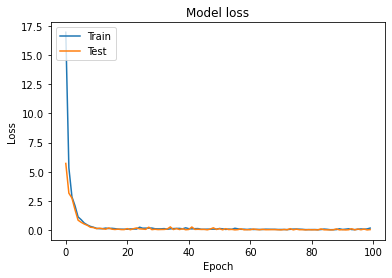

In [51]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()